<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Regression_With_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras
Runtime > Change Runtime Type > T4 GPU

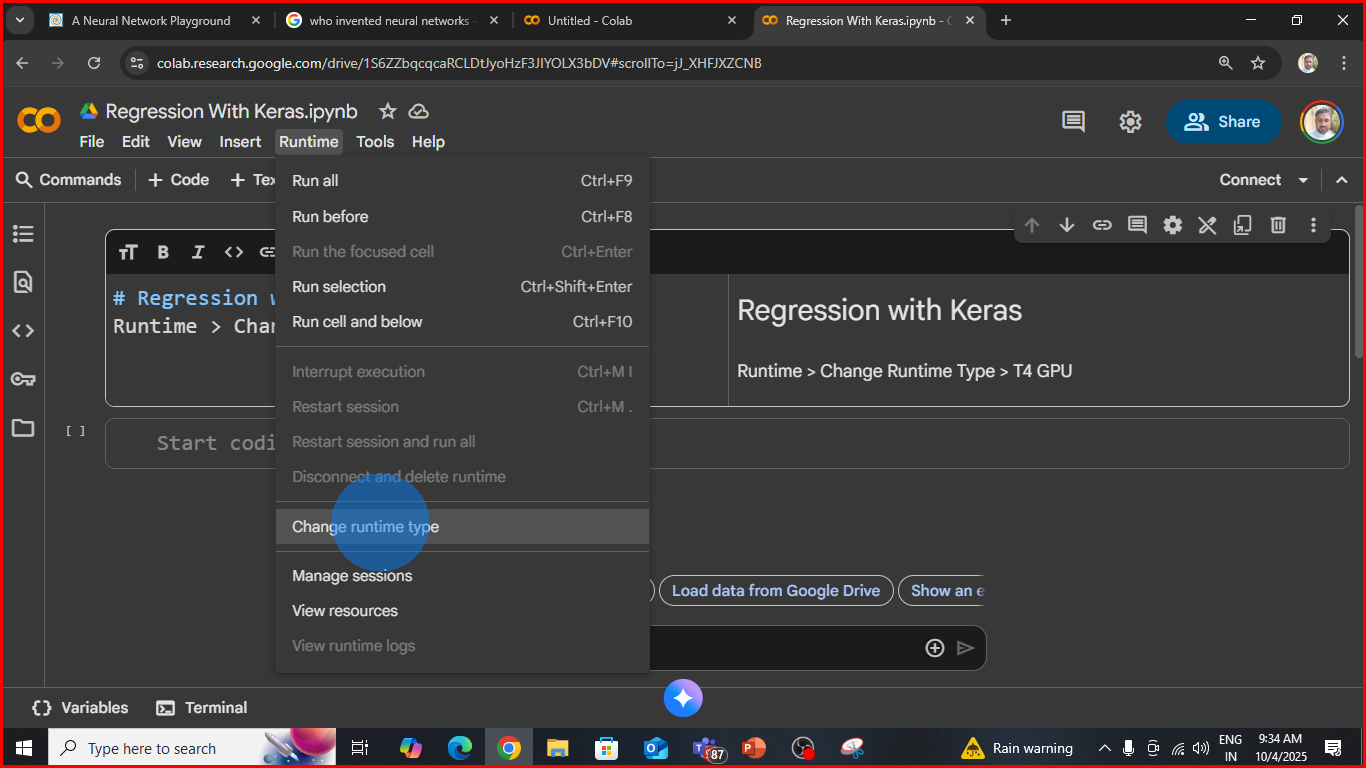

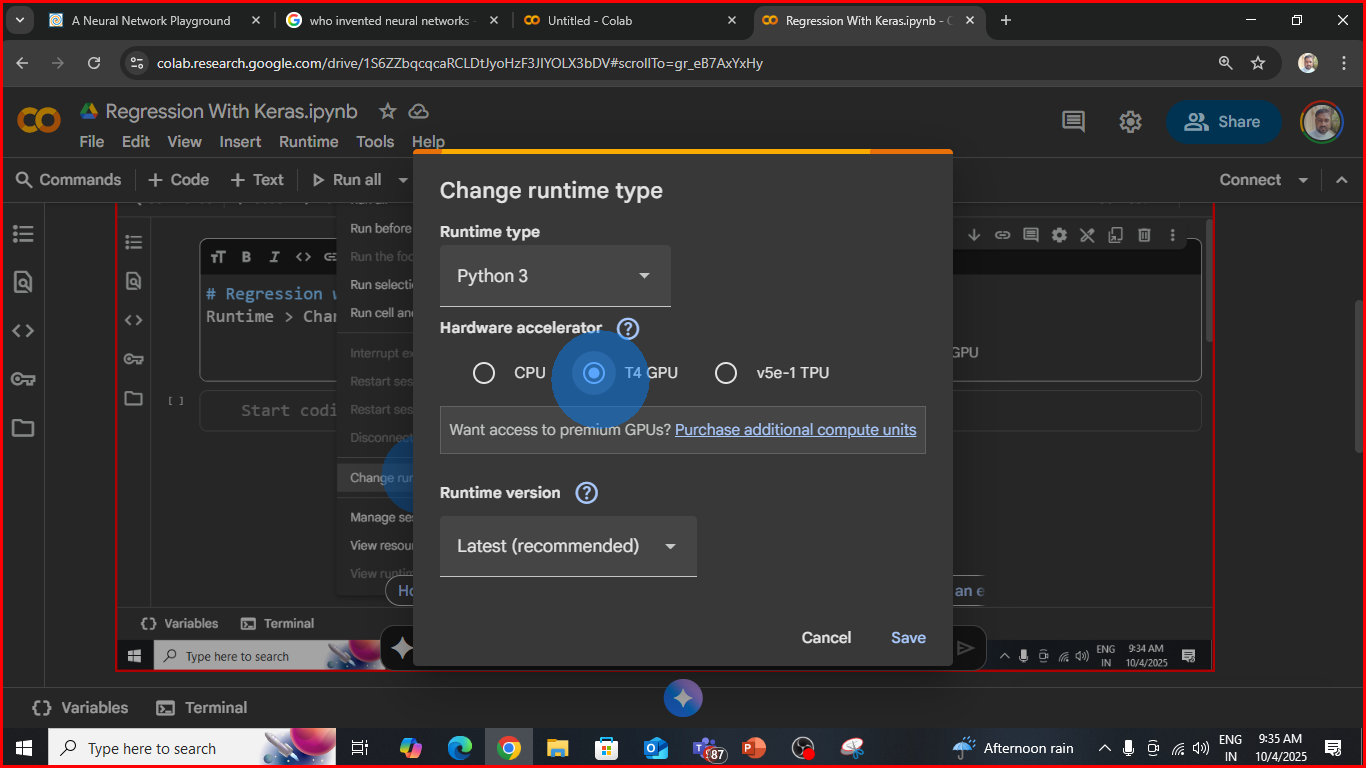

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [3]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Target Feature - PE Power Output in MW
1. AT - Atmospheric Temperature in degree celsius
2. V - Vaccum Pressure inside the boiler
3. AP - Atmospheric Pressure in Pascals
4. RH - Relative Humidity in %

# Step 2 - Perfom basic data quality checks

In [4]:
df.shape

(9568, 5)

In [5]:
df.duplicated().sum()

np.int64(41)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(9527, 5)

In [7]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


# Step 3 - Seperate X and Y(PE)

In [9]:
X = df.drop(columns = ["PE"])
Y = df["PE"]

In [10]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [11]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4 - Apply train test split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
xtrain.head()

,AT,V,AP,RH
5695,18.52,58.41,1013.77,99.89
7300,8.51,39.66,1015.16,86.61
9066,13.07,42.18,1014.98,87.77
6424,30.07,69.82,1010.39,57.53
6773,13.52,42.34,1017.97,95.34


In [14]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [15]:
xtest.head()

,AT,V,AP,RH
1087,33.26,68.51,1012.49,52.68
6308,8.48,38.50,1013.50,66.51
8021,8.75,36.30,1015.61,57.53
9483,20.78,62.52,1017.58,73.30
4459,19.39,68.61,1011.09,96.51


In [16]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [17]:
xtrain.shape

(7621, 4)

In [18]:
xtest.shape

(1906, 4)

# Apply Preprocessing on X

In [19]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [21]:
pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
).set_output(transform="pandas")

In [22]:
pipe.fit(xtrain)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [23]:
xtrain_pre = pipe.transform(xtrain)
xtest_pre = pipe.transform(xtest)

In [24]:
xtrain_pre.head()

,AT,V,AP,RH
5695,-0.154993,0.323693,0.084610,1.818417
7300,-1.504241,-1.151828,0.319064,0.907637
9066,-0.889599,-0.953518,0.288703,0.987193
6424,1.401831,1.221597,-0.485502,-1.086753
6773,-0.828943,-0.940927,0.793033,1.506365


In [25]:
xtest_pre.head()

,AT,V,AP,RH
1087,1.831812,1.118507,-0.131290,-1.419379
6308,-1.508285,-1.243114,0.039069,-0.470879
8021,-1.471891,-1.416242,0.394967,-1.086753
9483,0.149632,0.647127,0.727251,-0.005201
4459,-0.037726,1.126376,-0.367431,1.586607


# Step 5 - Build the neural networks

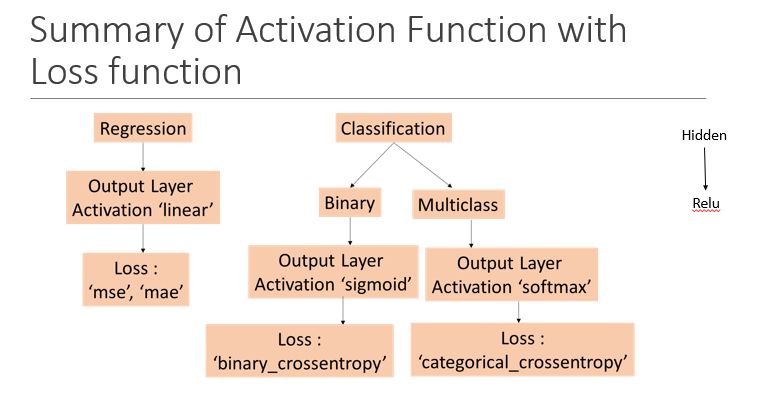

In [26]:
xtrain.shape[1]

4

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [28]:
model = Sequential(
    layers = [
        Input(shape = (xtrain.shape[1], )),
        Dense(units = 8, activation = "relu"),
        Dense(units = 4, activation = "relu"),
        Dense(units = 1, activation = "linear")
    ]
)

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compile the model and provide a loss function
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [31]:
# Train the model
hist = model.fit(xtrain_pre, ytrain, epochs=100, validation_split=0.2)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 206345.6875 - mae: 453.9387 - val_loss: 203808.8594 - val_mae: 451.1056
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 203167.0312 - mae: 450.3914 - val_loss: 195639.0156 - val_mae: 441.9146
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 192658.4531 - mae: 438.5056 - val_loss: 175746.4844 - val_mae: 418.6785
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 169542.1562 - mae: 411.0828 - val_loss: 140937.5938 - val_mae: 374.2054
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 131397.3281 - mae: 360.6463 - val_loss: 96234.2188 - val_mae: 305.8954
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 87354.5391 - mae: 289.6843 - val_loss: 56159.4844 - val_mae: 223.4366
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 50564.3398 - mae: 209.0271 - val_loss: 31846.5996 - val_mae: 155.0153
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 29741.6855 - 

# Plot the learning curve

In [34]:
print(hist.history["loss"])

[206158.171875, 201592.40625, 188342.71875, 161349.140625, 121216.84375, 77655.578125, 44515.8515625, 27045.05078125, 20026.54296875, 16672.291015625, 14083.2607421875, 11669.6416015625, 9391.4931640625, 7318.185546875, 5513.76513671875, 4052.190673828125, 2954.17626953125, 2148.58642578125, 1569.6083984375, 1155.64111328125, 857.684814453125, 644.841552734375, 491.9216003417969, 382.41925048828125, 302.7636413574219, 243.3712921142578, 198.37220764160156, 164.29595947265625, 137.9065399169922, 116.89662170410156, 100.14136505126953, 86.67513275146484, 75.78411865234375, 67.03837585449219, 59.92190933227539, 53.91421127319336, 48.79435729980469, 44.31816101074219, 40.81501770019531, 37.78708267211914, 35.0247802734375, 32.606414794921875, 30.68297004699707, 28.878875732421875, 27.31682586669922, 26.089982986450195, 25.014184951782227, 24.112619400024414, 23.40408706665039, 22.738693237304688, 22.220815658569336, 21.741331100463867, 21.428842544555664, 21.161638259887695, 20.88526916503

In [35]:
print(hist.history["val_loss"])

[203808.859375, 195639.015625, 175746.484375, 140937.59375, 96234.21875, 56159.484375, 31846.599609375, 21884.234375, 18045.02734375, 15489.345703125, 13080.30859375, 10777.623046875, 8603.8388671875, 6626.9921875, 4959.79345703125, 3653.97216796875, 2682.660400390625, 1965.0765380859375, 1450.8106689453125, 1074.857666015625, 807.7005004882812, 610.1809692382812, 470.6380310058594, 366.9720458984375, 293.069580078125, 237.4687042236328, 196.05809020996094, 163.04476928710938, 137.96124267578125, 117.83134460449219, 102.63152313232422, 87.6768569946289, 76.45195007324219, 67.7977066040039, 60.53711700439453, 53.905948638916016, 48.548126220703125, 44.101924896240234, 40.465667724609375, 37.072444915771484, 34.914283752441406, 32.114051818847656, 30.167341232299805, 28.523609161376953, 27.186758041381836, 26.04811668395996, 25.09462547302246, 24.213489532470703, 24.033174514770508, 23.01287841796875, 22.684795379638672, 21.99938201904297, 21.87825584411621, 21.524078369140625, 21.316192

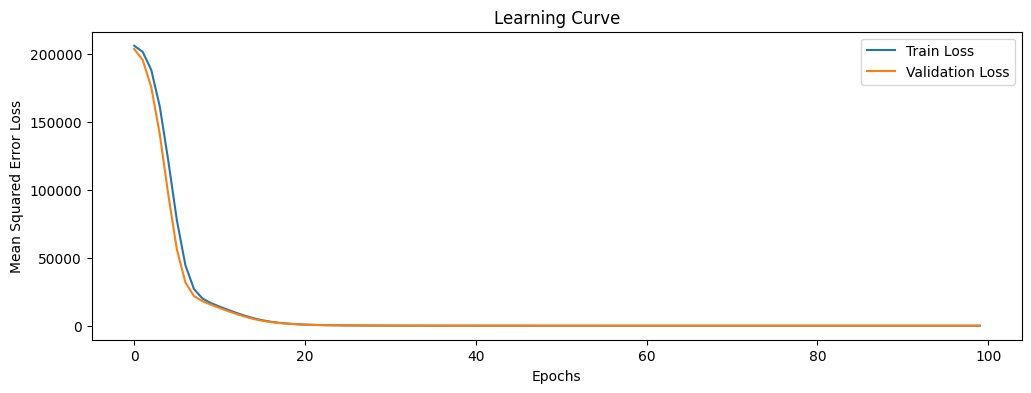

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

# Step 7 - Evaluate model

In [38]:
train_mse, train_mae = model.evaluate(xtrain_pre, ytrain)
print(f"Train MSE : {train_mse:.2f}")
print(f"Train MAE : {train_mae:.2f}")

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.3440 - mae: 3.4758
Train MSE : 19.57
Train MAE : 3.48


In [39]:
test_mse, test_mae = model.evaluate(xtest_pre, ytest)
print(f"Test MSE : {test_mse:.2f}")
print(f"Test MAE : {test_mae:.2f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.3821 - mae: 3.4118
Test MSE : 19.66
Test MAE : 3.52


In [40]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(model, x, y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f"RMSE : {rmse:.2f}")
  print(f"MAE : {mae:.2f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 : {r2:.2%}")

In [42]:
print("Training Results : ")
evaluate_model(model, xtrain_pre, ytrain)

Training Results : 
239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE : 4.42
MAE : 3.48
MAPE : 0.77%
R2 : 93.19%


In [43]:
print("Testing Results : ")
evaluate_model(model, xtest_pre, ytest)

Testing Results : 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE : 4.43
MAE : 3.52
MAPE : 0.77%
R2 : 93.49%


# Above results clearly show that this model is a good model and can be used for out of sample prediction r2 > 0.8 both in train and test

# Step 8 - Out of sample prediction

In [44]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [45]:
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [46]:
xnew.shape

(100, 4)

In [47]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [48]:
xnew_pre = pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380123,0.355958,-0.596825,0.810249
1,1.241431,0.046688,-1.030313,-1.836363
2,1.107989,1.488371,-2.015358,0.857571
3,0.811451,0.626666,-0.318516,0.048294
4,-1.012258,-1.061330,2.112049,-0.164999


In [51]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[445.72308],
       [439.38895],
       [432.08026],
       [440.34427],
       [474.65314]], dtype=float32)

# Save above in dataframe

In [52]:
xnew["PE_pred"] = preds.round(2)

In [53]:
xnew.head()

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.720001
1,28.88,54.89,1007.16,46.60,439.390015
2,27.89,73.21,1001.32,85.88,432.079987
3,25.69,62.26,1011.38,74.08,440.339996
4,12.16,40.81,1025.79,70.97,474.649994


In [54]:
xnew.to_csv("powerplant_results.csv", index=False)

# open the files and folders from below
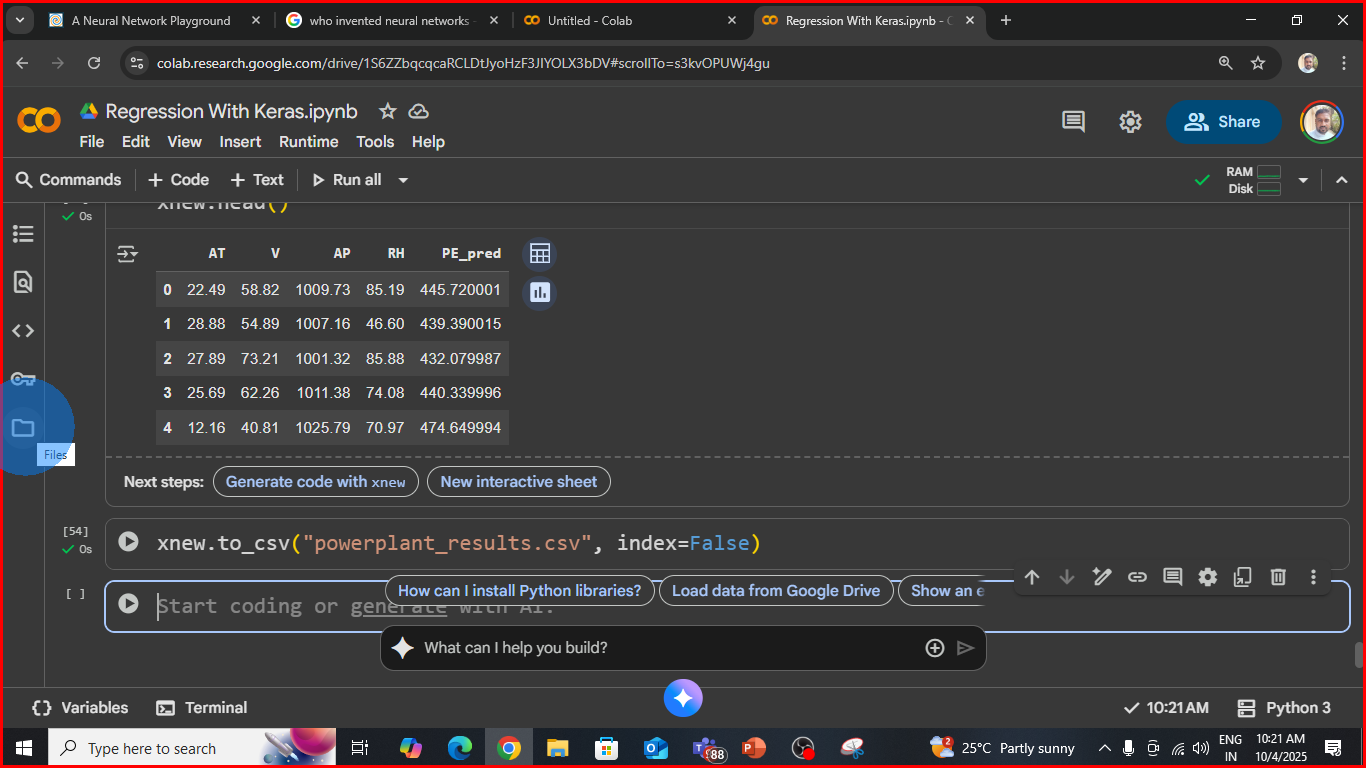

# Save the preprocessor and model object

In [57]:
!pip install joblib

In [55]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [56]:
model

<Sequential name=sequential, built=True>

In [58]:
# save preprocessor using joblib
import joblib
joblib.dump(pipe, "pre.joblib")

['pre.joblib']

In [59]:
# Save neural network .keras
model.save("powerplant_model.keras")

# Load the preprocesor and model object

In [60]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [61]:
from tensorflow.keras.models import load_model

m = load_model("powerplant_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)